In [30]:
import numpy as np
from sklearn import multiclass
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
def loadData():
    fp = open(fileName, 'r')
    lines = fp.readlines()
    rows =[]
    headers = lines[0].strip().split(',')[1:]
    #cast each row's values from string to float and form a list of rows
    for line in lines[1:]:
        l = []
        for x in line.strip().split(',')[1:]:
            if x == 'setosa': l.append(0)
            elif x == 'versicolor': l.append(1)
            elif x == 'virginica': l.append(2)
            else: l.append(float(x))
        rows.append(l)

    columns = len(rows[0]) - 1 #no. of features

    return headers, rows, columns

In [32]:
def shuffleData():
    np.random.seed(0)
    np.random.shuffle(rows)
    return rows

In [33]:
def splitData():
    trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = [], [], [], [], [], []

    #70% of the data is used as train data
    for i in range(int(0.7 * len(rows))):
        trainData.append(rows[i])
        trainTarget.append(rows[i][-1]) #the output column values of train data
        trainFeatures.append(rows[i][:-1]) #the list of feature values of train data

    #remainder(30%) of the data is used as test data 
    for i in range(int(0.3 * len(rows))):
        testData.append(rows[i])
        testTarget.append(rows[i][-1]) #the output column values of test data
        testFeatures.append(rows[i][:-1]) #the list of feature values of test data

    #Display total no. of records, train data and test data target values
    print('No. of records: ',len(trainData) + len(testData))
    print('trainTarget: ',  trainTarget)
    print('testTarget: ', testTarget)
    return trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures


In [34]:
def plotPairWise():
    sns.pairplot(df, hue="Species")
    plt.show()

In [35]:
def scatterplotOfBestPair():
    ax = sns.scatterplot(x = 'Petal.Length', y = 'Petal.Width', hue = 'Species', data = df)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Scatter plot - petal length vs petal width')
    plt.show()

In [36]:
def myLinspace(minValue, maxValue, steps):
    difference = maxValue - minValue
    return np.linspace(minValue - 1.0 * difference, maxValue + 1.0 * difference, steps)


In [37]:
def ovo_ovr_plot():
    x = df.loc[:, ['Petal.Length','Petal.Width']].values
    y = df['Species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values
    
    ovoClassifier = SVC(kernel='linear') # SVC follows one versus one approach
    ovrClassifier = LinearSVC() # LinearSVC follows one versus rest approach

    # accuracy of ovo classifier
    ovoClassifier.fit(trainFeatures, trainTarget)
    predictedOutputs = ovoClassifier.predict(testFeatures)
    accuracy = accuracy_score(testTarget, predictedOutputs)
    print('Accuracy of the ovo classification: ', accuracy * 100, '%')

    # accuracy of ovr classifier
    ovrClassifier.fit(trainFeatures, trainTarget)
    predictedOutputs = ovrClassifier.predict(testFeatures)
    accuracy = accuracy_score(testTarget, predictedOutputs)
    print('Accuracy of the ovr classification: ', accuracy * 100, '%')

    ovoClassifier.fit(x, y)
    ovrClassifier.fit(x, y)

    steps = 200
    x0 = myLinspace(min(x[:,0]), max(x[:,0]), steps)
    x1 = myLinspace(min(x[:,1]), max(x[:,1]), steps)
    xx0, xx1 = np.meshgrid(x0, x1)
    meshData = np.c_[xx0.ravel(), xx1.ravel()]
    ovoDecisionFunc = ovoClassifier.decision_function(meshData)
    ovrDecisionFunc = ovrClassifier.decision_function(meshData)

    newDecisionFunc = multiclass._ovr_decision_function(ovrDecisionFunc < 0, -ovrDecisionFunc, 3).reshape(steps, steps, 3)
    ovoDecisionFunc = ovoDecisionFunc.reshape(steps, steps, 3)
    ovrDecisionFunc = ovrDecisionFunc.reshape(steps, steps, 3)

    colors = ['red', 'green', 'blue']
    yColor = [colors[i] for i in y]

    plt.figure(figsize = (18, 12))
    contourColors = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

    for i in range(3):
        plt.subplot(2, 3, i + 1)
        plt.scatter(x[:,0], x[:,1], c = yColor)
        plt.contourf(xx0, xx1, ovoDecisionFunc[:,:,i], 20, cmap=contourColors[i], alpha=0.5) # plots ovo classifications
        plt.subplot(2, 3, i + 4)
        plt.scatter(x[:,0], x[:,1], c = yColor)
        plt.contourf(xx0, xx1, newDecisionFunc[:,:,i], 20, cmap=contourColors[i], alpha=0.5) # plots ovr classifications

    plt.show()

In [38]:
def useOfKernels():
    for kernel in ['linear', 'rbf', 'poly']:
        svmClassifier = SVC(kernel = kernel, degree = 2) if kernel == 'poly' else SVC(kernel = kernel) 
        svmClassifier.fit(trainFeatures, trainTarget)
        predictedOutputs = svmClassifier.predict(testFeatures)
        accuracy = accuracy_score(testTarget, predictedOutputs)
        print('Accuracy of SVM using ',kernel, 'kernel: ', accuracy * 100, '%')
        plot_confusion_matrix(svmClassifier, testFeatures, testTarget)
        plt.show()
        print(classification_report(testTarget, predictedOutputs))

In [39]:
fileName = 'iris.csv' #file name

headers, rows, columns = loadData() #function call to load data (also acts as the main function)

rows = shuffleData() #function call to shuffle data

trainData, testData, trainTarget, testTarget, trainFeatures, testFeatures = splitData() #function call to split data

No. of records:  150
trainTarget:  [2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2]
testTarget:  [2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0]


SVM Model

In [40]:
svm_model = SVC(gamma = 'scale') # default uses rbf kernel

# training the model with the training data
svm_model.fit(trainFeatures, trainTarget)

# testing the model with the training data
predictedOutput = svm_model.predict(trainFeatures)

Model accuracy on training data

In [41]:
trainAccuracy = accuracy_score(trainTarget, predictedOutput)
print('Accuracy of the model on training: ', trainAccuracy * 100, '%')

# converting list of lists to a dataframe
df = pd.DataFrame(rows, columns = headers)

Accuracy of the model on training:  98.09523809523809 %


In [42]:
# mapping values assigned to the species names back to names 
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df) # modified dataframe 

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             5.8          2.8           5.1          2.4   virginica
1             6.0          2.2           4.0          1.0  versicolor
2             5.5          4.2           1.4          0.2      setosa
3             7.3          2.9           6.3          1.8   virginica
4             5.0          3.4           1.5          0.2      setosa
..            ...          ...           ...          ...         ...
145           4.9          3.1           1.5          0.1      setosa
146           6.3          2.9           5.6          1.8   virginica
147           5.8          2.7           4.1          1.0  versicolor
148           7.7          3.8           6.7          2.2   virginica
149           4.6          3.2           1.4          0.2      setosa

[150 rows x 5 columns]


Visualization of every feature in the dataset with every other using pairplot 

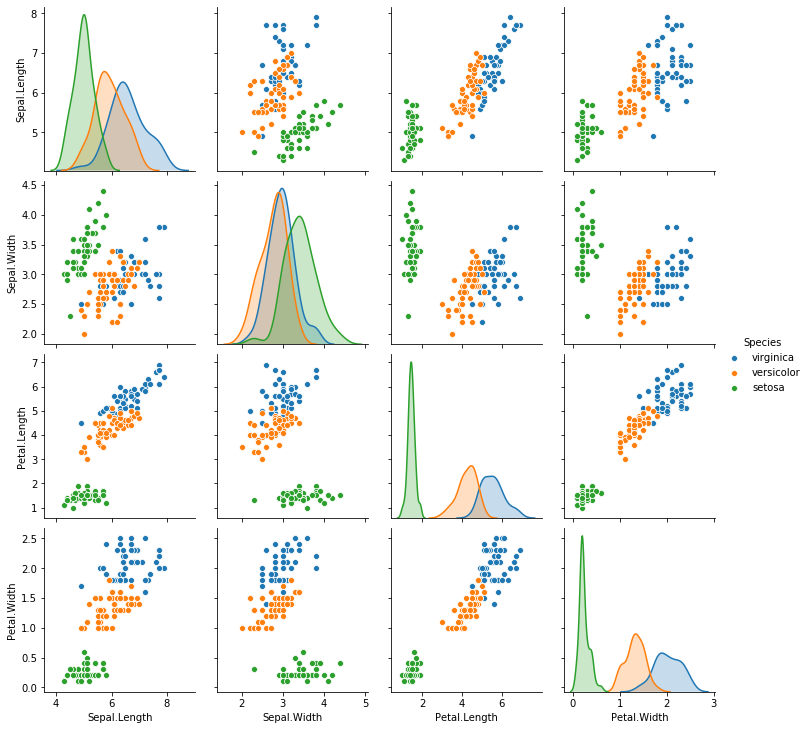

In [43]:
plotPairWise()

a) From the scatter plots and the kdeplots in the pairplot(a plot which pairs every feature with every other feature), we can observe that petal length and petal width separate the data easily. The scatter plot between the petal length and petal width has been used to further prove this.

Scatter plot of the best pair

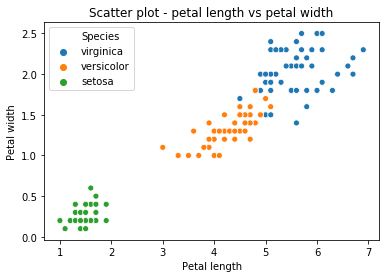

In [44]:
scatterplotOfBestPair()

Plotting ovo and ovr classifications

Accuracy of the ovo classification:  97.77777777777777 %
Accuracy of the ovr classification:  95.55555555555556 %


c:\users\kriti\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


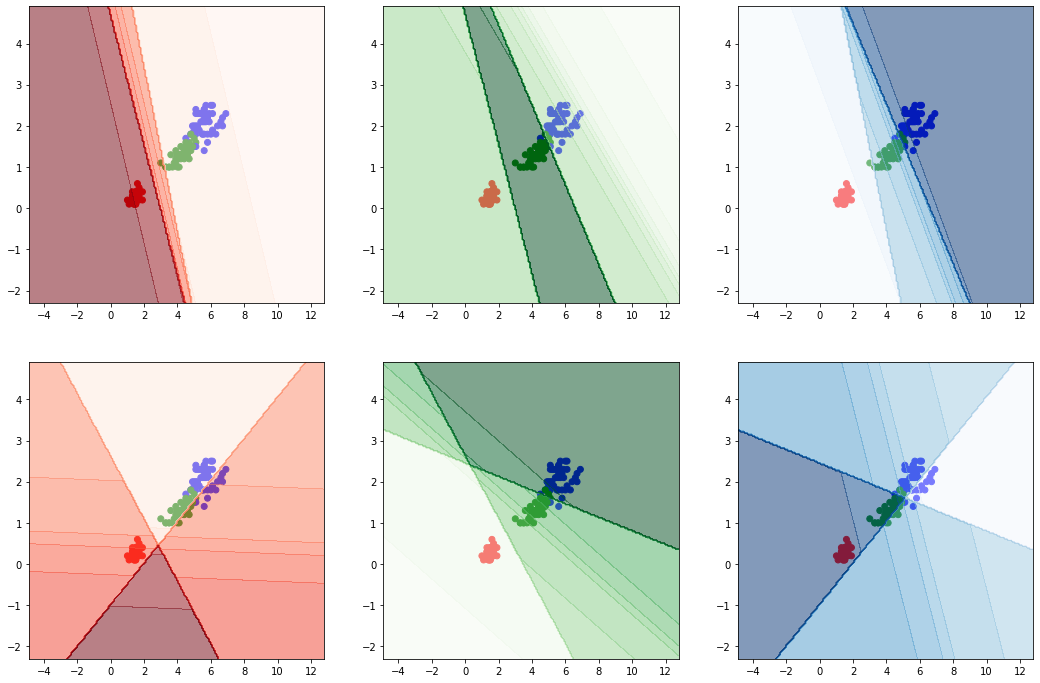

In [45]:
ovo_ovr_plot()

b) The above plot consists of OVO(one vs one) classifications in the first row and OVR(one vs rest) in the second row. These plots alongwith the accuracy of both the classifiers(accuracy of OVO classifier is 97.77% and that of OVR classifier is 95.56%) clearly shows that OVO classifier performs better than OVR classifier. Also, it is easier to compute OVO classifications compared to OVR because the latter is both time consuming and is more prone to imbalanced dataset. It is even believed that the performance of kernel methods does not scale in proportion to the size of the training dataset and using subsets of the training data may counter this effect hence OVO classification is preferred.

Testing the model using different kernels

Accuracy of SVM using  linear kernel:  97.77777777777777 %


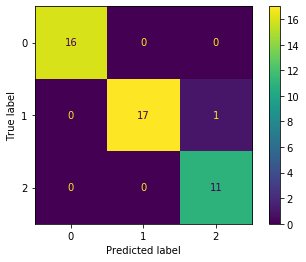

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of SVM using  rbf kernel:  97.77777777777777 %


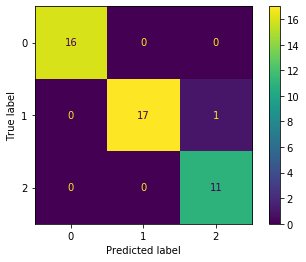

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of SVM using  poly kernel:  97.77777777777777 %


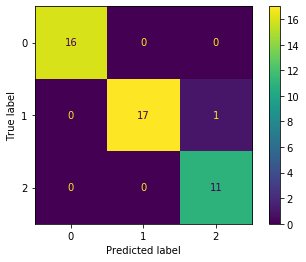

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [46]:
useOfKernels()

c) The above classification reports, confusion matrices and model accuracies show that all the 3 kernels(Linear, RBF and Quadratic) perform to the same extent on this Iris dataset.

Conclusion:

The above model is an SVM classifier which has been used to classify the flowers in the Iris dataset.

The model performs with an accuracy of 98.09% on the training data and with an average of 97.77% on test data using the different kernels(Linear, RBF and Quadratic).